In [1]:
!pip freeze > kaggle_image_requirements.txt

# Lea y pre-procese el dataset Enron

Lea el dataset Enron y obtenga una idea de los datos imprimiendo mensajes de muestra en la pantalla


In [2]:
import numpy as np # linear algebra
import pandas as pd # procesando datos, CSV file I/O (e.g. pd.read_csv)

# Input data files disponibles en el directorio "../input/".
filepath = "../input/emails/emails.csv"

# Leer los datos enron en un pandas.DataFrame llamada emails
emails = pd.read_csv(filepath)

print("¡Se cargaron exitosamente {} filas and {} columnas!".format(emails.shape[0], emails.shape[1]))
print(emails.head())

¡Se cargaron exitosamente 517401 filas and 2 columnas!
                       file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...


In [3]:
# 1) DESPLIEGUE CON MAYOR DETALLE EL SEGUNDO EMAIL 
emails.iloc[1,1]

"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: john.lavorato@enron.com\nSubject: Re:\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>\nX-cc: \nX-bcc: \nX-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nTraveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what 

Separar los encabezados (headers) de los cuerpos del mensaje

In [4]:
import email

def extract_messages(df):
    messages = []
    for item in df["message"]:
        # Regresar una estructura de objeto de mensaje a partir de un string
        e = email.message_from_string(item)    
        # obtener el cuerpo del mensaje  
        message_body = e.get_payload()
        messages.append(message_body)
    print("¡Se recuperó existosamente el cuerpo del mensaje a partir de los e-mails!")
    return messages

#2) EXTRAIGA LOS MENSAJES DE LOS EMAILS EN UNA LISTA LLAMADA bodies, usando la función anterior
bodies = extract_messages(emails)

¡Se recuperó existosamente el cuerpo del mensaje a partir de los e-mails!


In [5]:
import random

##3) GENERE UN DATAFRAME LLAMADO bodies_df UTILIZANDO LA BIBLIOTECA PANDAS, EL CUAL DEBE CONTENER UNA MUESTRA ALEATORIA DE 10,000 ELEMENTOS DE LA LISTA BODIES. 
##USE LA FUNCIÓN RANDOM.SAMPLE PARA OBTENER LA MUESTRA. ESTO PERMITE CREAR NUESTRO PROPIO DATASET
bodies_df = pd.DataFrame(random.sample(bodies,10000))

#expandir las opciones de display default de pandas para hacer los emails más claramente visibles cuando se impriman
pd.set_option('display.max_colwidth', 300)

bodies_df.head() # podrían hacer print(bodies_df.head()), pero Jupyter despliega más amigable for pandas DataFrames

,0
0,"please print\n---------------------- Forwarded by Jeffrey A Shankman/HOU/ECT on 10/20/2000 \n08:03 AM ---------------------------\n\n\nDavid W Delainey\n10/19/2000 07:36 PM\nTo: John J Lavorato/Corp/Enron@Enron, John Arnold/HOU/ECT@ECT, Kevin M \nPresto/HOU/ECT@ECT, Tim Belden/HOU/ECT@ECT, Jeffr..."
1,"\n\nAlice S. Eagleson\nMBA Candidate, May 2002\nWalter A. Haas School of Business\neagleson@haas.berkeley.edu\n415-567-5796\n\n\n\n-----Original Message-----\nFrom: Alice Eagleson [mailto:aseagleson@yahoo.com]\nSent: Monday, September 10, 2001 5:55 PM\nTo: mba02@haas.berkeley.edu; mba03@haas.ber..."
2,"Elizabeth, Jeff forwarded me your questions about capacity options. I've \nanswered them to the extent they involve legal/regulatory issues. If you \nneed anything further please don't hesitate to call.\n\n? Can a new shipper who enters into an FTS-1 contract with zero MDQ in order \nto purch..."
3,"Thank you Vince. I look forward to speaking with you tomorrow, and in\nmeeting you on April 13th!\n\nRegards,\n\nKate Szablya\n\nPower Brokers, LLC\nEnergy Search and Recruitment\n303-716-2987\n303-619-7589 cell\n303-716-3426 fax\nwww.powerbrokersllc.com"
4,"Check my voice mail. Brent and I would like to finalize invoice in the next few hours if possible. Thanks.\n\nSara Shackleton\nEnron Wholesale Services\n1400 Smith Street, EB3801a\nHouston, TX 77002\nPh: (713) 853-5620\nFax: (713) 646-3490"


El siguiente código (comentado) es posiblemente la forma más al estilo Python de lograr la extracción de los cuerpos de los mensajes. Tiene solo 2 líneas y logra el mismo resultado. Sin embargo, creemos que el código anterior es más transparente con respecto a cómo se lleva a cabo el procesamiento y, como tal, lo dejamos aquí para los expertos en Python si así lo prefieren.

In [6]:
#messages = emails["message"].apply(email.message_from_string)
#bodies_df = messages.apply(lambda x: x.get_payload()).sample(10000)

# Lea y Preprocese el Corpus de Email Fraudulent "419"

In [7]:
filepath = "../input/fraudulent-email-corpus/fradulent_emails.txt"
with open(filepath, 'r',encoding="latin1") as file:
    data = file.read()

Imprima los primeros 20000 caracteres de read file string (esto nos da unos pocos emails), y dése cuenta del keyword `From r` cercano al inicio de cada encabezado de email

In [8]:
print(data[:20000])

From r  Wed Oct 30 21:41:56 2002
Return-Path: <james_ngola2002@maktoob.com>
X-Sieve: cmu-sieve 2.0
Return-Path: <james_ngola2002@maktoob.com>
Message-Id: <200210310241.g9V2fNm6028281@cs.CU>
From: "MR. JAMES NGOLA." <james_ngola2002@maktoob.com>
Reply-To: james_ngola2002@maktoob.com
To: webmaster@aclweb.org
Date: Thu, 31 Oct 2002 02:38:20 +0000
Subject: URGENT BUSINESS ASSISTANCE AND PARTNERSHIP
X-Mailer: Microsoft Outlook Express 5.00.2919.6900 DM
MIME-Version: 1.0
Content-Type: text/plain; charset="us-ascii"
Content-Transfer-Encoding: 8bit
X-MIME-Autoconverted: from quoted-printable to 8bit by sideshowmel.si.UM id g9V2foW24311
Status: O

FROM:MR. JAMES NGOLA.
CONFIDENTIAL TEL: 233-27-587908.
E-MAIL: (james_ngola2002@maktoob.com).

URGENT BUSINESS ASSISTANCE AND PARTNERSHIP.


DEAR FRIEND,

I AM ( DR.) JAMES NGOLA, THE PERSONAL ASSISTANCE TO THE LATE CONGOLESE (PRESIDENT LAURENT KABILA) WHO WAS ASSASSINATED BY HIS BODY GUARD ON 16TH JAN. 2001.


THE INCIDENT OCCURRED IN OUR PRESENCE WH

Dividir en la palabra clave `From r` que aparece cerca del comienzo de cada correo electrónico

In [9]:
fraud_emails = data.split("From r")

print("¡Cargó exitosamente {} emails de spam!".format(len(fraud_emails)))

¡Cargó exitosamente 3978 emails de spam!


In [10]:
fraud_bodies = extract_messages(pd.DataFrame(fraud_emails,columns=["message"],dtype=str))
fraud_bodies_df = pd.DataFrame(fraud_bodies[1:])

fraud_bodies_df.head() # podrías hacer print(fraud_bodies_df.head()), pero Jupyter despliega esto mejor para pandas DataFrames

¡Se recuperó existosamente el cuerpo del mensaje a partir de los e-mails!


,0
0,"FROM:MR. JAMES NGOLA.\nCONFIDENTIAL TEL: 233-27-587908.\nE-MAIL: (james_ngola2002@maktoob.com).\n\nURGENT BUSINESS ASSISTANCE AND PARTNERSHIP.\n\n\nDEAR FRIEND,\n\nI AM ( DR.) JAMES NGOLA, THE PERSONAL ASSISTANCE TO THE LATE CONGOLESE (PRESIDENT LAURENT KABILA) WHO WAS ASSASSINATED BY HIS BODY G..."
1,"Dear Friend,\n\nI am Mr. Ben Suleman a custom officer and work as Assistant controller of the Customs and Excise department Of the Federal Ministry of Internal Affairs stationed at the Murtala Mohammed International Airport, Ikeja, Lagos-Nigeria.\n\nAfter the sudden death of the former Head of s..."
2,"FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF ELEME KINGDOM \nCHIEF DANIEL ELEME, PHD, EZE 1 OF ELEME.E-MAIL \nADDRESS:obong_715@epatra.com \n\nATTENTION:PRESIDENT,CEO Sir/ Madam. \n\nThis letter might surprise you because we have met\nneither in person nor by correspondence. But I believe\nit is..."
3,"FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF ELEME KINGDOM \nCHIEF DANIEL ELEME, PHD, EZE 1 OF ELEME.E-MAIL \nADDRESS:obong_715@epatra.com \n\nATTENTION:PRESIDENT,CEO Sir/ Madam. \n\nThis letter might surprise you because we have met\nneither in person nor by correspondence. But I believe\nit is..."
4,"Dear sir, \n \nIt is with a heart full of hope that I write to seek your help in respect of the context below. I am Mrs. Maryam Abacha the former first lady of the former Military Head of State of Nigeria General Sani Abacha whose sudden death occurred on 8th of June 1998 as a result of cardiac ..."


# Definir funciones de tokenización, eliminación de stop-words y eliminación de puntuación

Antes de continuar, debemos decidir cuántas muestras extraer de cada clase. También debemos decidir la cantidad máxima de tokens por correo electrónico y la longitud máxima de cada token. Esto se hace configurando los siguientes hiperparámetros generales

In [11]:
Nsamp = 1000 # número de muestras a generar en cada clase - 'spam', 'not spam'
maxtokens = 200 # el número máximo de tokens por documento
maxtokenlen = 100 # la longitud máxima de cada token

**Tokenization**

In [12]:
def tokenize(row):
    if (row == None or row == ''):
        tokens = ""
    else:
        tokens = str(row).split(" ")[:maxtokens]
    return tokens

**Usar regular expressions para quitar caracteres no necesarios** 

Después, definimos una función para eliminar los signos de puntuación y otros caracteres no alfabéticos (usando expresiones regulares) de los correos electrónicos con la ayuda de la omnipresente biblioteca de expresiones regulares de Python. En el mismo paso, truncamos todos los tokens a la hiperparámetro `maxtokenlen` definido anteriormente

In [13]:
import re

def reg_expressions(row):
    tokens = []
    try:
        for token in row:
            #4) ESCRIBA UNA LÍNEA DE CÓDIGO QUE CONVIERTA UNA VARIABLE LLAMADA token A MINÚSCULAS Y ALMACENE EL RESULTADO NUEVAMENTE EN LA MISMA VARIABLE token
            token = token.lower()
            token = re.sub(r'[\W\d]', "", token)
            #5) TRUNQUE EL TOKEN A LA MÁXIMA LONGITUD ANTES DEFINIDA
            token = token[:maxtokenlen]
            tokens.append(token)
    except:
        token = ""
        tokens.append(token)
    return tokens

**Eliminación de Stop-word**

Definamos una función para eliminar las stopwords —palabras que ocurren con tanta frecuencia en el lenguaje que no ofrecen información útil para la clasificación. Esto incluye palabras como “the” y “are”, y la popular biblioteca NLTK proporciona una lista ampliamente utilizada que se empleará.

In [14]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')    

def stop_word_removal(row):
    ###6) CREE UNA NUEVA LISTA LLAMADA TOKEN, QUE CONTENGA SOLO AQUELLOS TOKENS DE ROW QUE NO ESTÉN EN STOPWORDS."
    token = [word for word in row if word not in stopwords]
    token = filter(None, token)
    return token

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


# Modelo Bag-of-words 

Para que la computadora pueda hacer inferencias sobre los correos electrónicos, debe ser capaz de interpretar el texto mediante una representación numérica de este. Una forma de hacerlo es utilizando un modelo llamado 'bag-of-words'. Este modelo simplemente cuenta la frecuencia de los tokens de palabras para cada correo electrónico y, de este modo, lo representa como un vector de estos conteos.

**Función Assemble matrices** 

La función `assemble_bag()` ensambla un dataframe nuevo que contiene todas las palabras únicas encontradas en documentos de texo. Cuenta la frecuencia por palabra y luego regresa el dataframe nuevo.

In [15]:
def assemble_bag(data):
    used_tokens = []
    all_tokens = []

    for item in data:
        for token in item:
            if token in all_tokens:
                if token not in used_tokens:
                    used_tokens.append(token)
            else:
                all_tokens.append(token)
    
    df = pd.DataFrame(0, index = np.arange(len(data)), columns = used_tokens)
    
    for i, item in enumerate(data):
        for token in item:
            if token in used_tokens:
                #####7) ESCRIBAN UNA LÍNEA DE CÓDIGO QUE INCREMENTE EN 1 EL VALOR EN LA FILA i Y LA COLUMNA CORRESPONDIENTE A token EN EL DATAFRAME df
                df.at[i, token] += 1
    return df

# Poniendo todo junto para armar el Dataset

Se hacen todos los pasos de pre-procesamiento para armar nuestro dataset...

In [16]:
# Convertir todo a lower-case, truncar a maxtokens y truncar cada token a maxtokenlen
EnronEmails = bodies_df.iloc[:,0].apply(tokenize)
EnronEmails = EnronEmails.apply(stop_word_removal)
EnronEmails = EnronEmails.apply(reg_expressions)
EnronEmails = EnronEmails.sample(Nsamp)

SpamEmails = fraud_bodies_df.iloc[:,0].apply(tokenize)
SpamEmails = SpamEmails.apply(stop_word_removal)
SpamEmails = SpamEmails.apply(reg_expressions)
SpamEmails = SpamEmails.sample(Nsamp)

raw_data = pd.concat([SpamEmails,EnronEmails], axis=0).values

In [17]:
print("El tamaño de los datos combinados es:")
print(raw_data.shape)
print("Los datos son:")
print(raw_data)

# crear las etiquetas correspondientes
Categories = ['spam','notspam']
header = ([1]*Nsamp)
header.extend(([0]*Nsamp))

El tamaño de los datos combinados es:
(2000,)
Los datos son:
[list(['dear', 'friendgreetings', 'with', 'warm', 'heart', 'i', 'offer', 'friendship', 'i', 'hope', 'mail', 'meets', 'good', 'time', 'however', 'strange', 'surprising', 'contact', 'might', 'seem', 'met', 'personally', 'dealings', 'past', 'i', 'humbly', 'ask', 'take', 'due', 'consideration', 'importance', 'immense', 'benefit', 'i', 'duly', 'apologize', 'infringing', 'privacy', 'contact', 'acceptable', 'you', 'i', 'make', 'proposal', 'person', 'integrity', 'first', 'foremost', 'i', 'wish', 'introduce', 'properly', 'you', 'i', 'mr', 'patrick', 'fmassaquoi', 'son', 'late', 'formal', 'liberia', 'sport', 'minister', 'mr', 'francois', 'massaquoi', 'killed', 'office', 'after', 'death', 'father', 'charles', 'taylor', 'control', 'government', 'providing', 'family', 'security', 'resently', 'united', 'nations', 'united', 'state', 'government', 'asked', 'liberia', 'head', 'state', 'charles', 'taylor', 'members', 'cabinet', 'go', 'exile', 

¡Estamos ahora listos para convertirlos en valores numéricos!!

**Crear features y labels**

In [18]:
# crear modelo bag-of-words 
EnronSpamBag = assemble_bag(raw_data)
# la siguiente es la lista de palabras en nuestro modelo bag-of-words
predictors = [column for column in EnronSpamBag.columns]
EnronSpamBag # despliegue el modelo para el usuario

,i,contact,you,mr,united,government,liberia,state,charles,taylor,...,implemented,booking,bike,jsubject,shirleysubject,labbe,deboisblanc,wording,iferc,hub
0,7,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,2,0,0,0,0


In [19]:
# hacer un shuffle inicial del raw data
def unison_shuffle_data(data, header):
    p = np.random.permutation(len(header))
    data = data[p,:]
    header = np.asarray(header)[p]
    return data, header
data, header = unison_shuffle_data(EnronSpamBag.values, header)

# dividir en conjuntos independientes 
idx = int(0.7*data.shape[0])

# 70% de datos para training
train_x = data[:idx,:]
train_y = header[:idx]
# # restante 30% para testing
test_x = data[idx:,:]
test_y = header[idx:] 

print("detalles de train_x/train_y, para asegurar que tengan la forma correcta:")
print(len(train_x))
print(train_x)
print(train_y[:5])
print(len(train_y))

detalles de train_x/train_y, para asegurar que tengan la forma correcta:
1400
[[0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [5 0 1 ... 0 0 0]
 ...
 [1 0 1 ... 0 0 0]
 [5 2 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]]
[0 1 1 0 0]
1400


Como 70% de 2000 es 1400, !se ve bien! (para Nsamp=1000)

¡Sigamos!

# Clasificador de Regresión Logística

In [20]:
from sklearn.linear_model import LogisticRegression

def fit(train_x,train_y):
    model = LogisticRegression()

    try:
        model.fit(train_x, train_y)
    except:
        pass
    return model

model = fit(train_x,train_y)

In [21]:
predicted_labels = model.predict(test_x)

# imprimir todos los labels para transparencia completa
print("DEBUG:: Los labels completos de regresión logística son:")
print(predicted_labels)

DEBUG:: Los labels completos de regresión logística son:
[1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0
 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0
 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1
 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0
 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1
 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0
 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 

In [22]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(test_y, predicted_labels)

print("DEBUG::El accuracy score de regresión logística es::")
print(acc_score)

DEBUG::El accuracy score de regresión logística es::
0.9933333333333333


# Clasificador de Support Vector Machine

In [23]:
import time
from sklearn.svm import SVC # modelo de Support Vector Classification

In [24]:
# Crear un clasificador de soporte vectorial
clf = SVC(C=1, gamma="auto", probability=True)

# Ajustar el clasificador usando datos de entrenamiento
start_time = time.time()
clf.fit(train_x, train_y)
end_time = time.time()
print("Entrenar el Clasificador SVC tomó %3d segundos"%(end_time-start_time))

predicted_labels = clf.predict(test_x)
print("DEBUG::Las labels del Clasificador SVC son::")
print(predicted_labels)

acc_score = accuracy_score(test_y, predicted_labels)

print("DEBUG::El accuracy score del Clasificador SVC es::")
print(acc_score)

Entrenar el Clasificador SVC tomó  54 segundos
DEBUG::Las labels del Clasificador SVC son::
[1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0
 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1
 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1
 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0
 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1
 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0
 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1
 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0
 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0
 0 0 0 1

# Random Forests

In [25]:
# Cargar el scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Create un Clasificador random forest. Por convención, clf significa 'Classifier'
clf = RandomForestClassifier(n_jobs=1, random_state=0)

# Entrenar al clasificador para que tome las características de entrenamiento y aprenda cómo se relacionan con el entrenamiento de y (spam, not spam?)
start_time = time.time()
clf.fit(train_x, train_y)
end_time = time.time()
print("Entrenar el Random Forest Classifier tomó %3d segundos"%(end_time-start_time))

predicted_labels = clf.predict(test_x)
print("DEBUG::Las etiquetas RF predecidas son::")
print(predicted_labels)

acc_score = accuracy_score(test_y, predicted_labels)

print("DEBUG::El RF testing accuracy score es::")
print(acc_score)

Entrenar el Random Forest Classifier tomó   2 segundos
DEBUG::Las etiquetas RF predecidas son::
[1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0
 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0
 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1
 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0
 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1
 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0
 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0
 0 0

In [26]:
# Ahora, ajuste los parámetros sistemáticamente
from sklearn.model_selection import GridSearchCV

print("Available hyper-parameters for systematic tuning available with RF:")
print(clf.get_params())

## seleccione un subconjunto de parámetros a ajustar, y especifique grid para cada uno
param_grid = {
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 6, 10],
    'n_estimators': [10, 100, 1000]
}
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Ajuste la búsqueda de grid a los datos
grid_search.fit(train_x, train_y)

print("Los mejores parámetros encontrados:")
print(grid_search.best_params_)

print("La accuracy estimada es:")
acc_score = accuracy_score(test_y, grid_search.best_estimator_.predict(test_x))
print(acc_score)

Available hyper-parameters for systematic tuning available with RF:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Los mejores parámetros encontrados:
{'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
La accuracy estimada es:
0.9866666666666667


# Máquinas Gradient Boosting 

In [27]:
from sklearn.ensemble import GradientBoostingClassifier  # algoritmo GBM 
from sklearn import metrics   #Funciones scklearn adicionales
from sklearn.model_selection import cross_val_score, GridSearchCV

def modelfit(alg, train_x, train_y, predictors, test_x, performCV=True, printFeatureImportance=False, cv_folds=5):
    #Ajuste el algoritmo a los datos
    alg.fit(train_x, train_y)
        
    #Prediga conjunto de training: 
    predictions = alg.predict(train_x)
    predprob = alg.predict_proba(train_x)[:,1]
    
    #Haga cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, train_x, train_y, cv=cv_folds, scoring='roc_auc')
    
    #Imprima reporte de modelo:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(train_y,predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(train_y, predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Imprimir Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp[:10].plot(kind='bar', title='Feature Importances')
        
    return alg.predict(test_x),alg.predict_proba(test_x)
        
gbm0 = GradientBoostingClassifier(random_state=10)

start_time = time.time()
test_predictions, test_probs = modelfit(gbm0, train_x, train_y, predictors, test_x)
end_time = time.time()

print("El entrenamiento del Gradient Boosting Classifier tomó %3d segundos"%(end_time-start_time))

predicted_labels = test_predictions
print("DEBUG::Los labels predecidos de Gradient Boosting son::")
print(predicted_labels)

acc_score = accuracy_score(test_y, predicted_labels)

print("DEBUG::El testing accuracy score de Gradient Boosting es::")
print(acc_score)


Model Report
Accuracy : 0.9979
AUC Score (Train): 0.999292
CV Score : Mean - 0.9922448 | Std - 0.004247265 | Min - 0.9863776 | Max - 0.9996429
El entrenamiento del Gradient Boosting Classifier tomó 231 segundos
DEBUG::Los labels predecidos de Gradient Boosting son::
[1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0
 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0
 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1
 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0
 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1
 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 

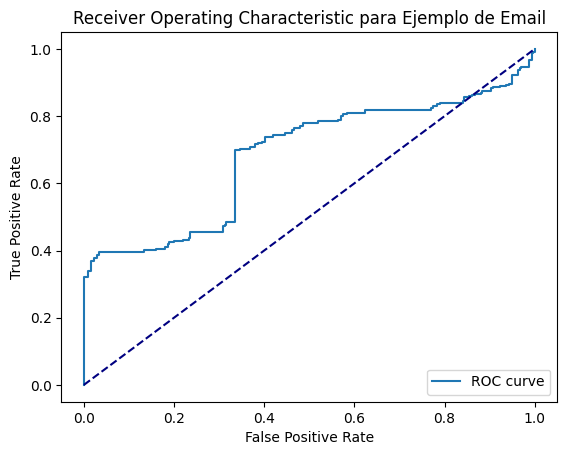

In [28]:
# Haga una curva ROC
test_probs_max = [] # primero encontrar las probabilidades correspondientes 
                    # a la clase más probable (máxima probabilidad)
for i in range(test_probs.shape[0]):
    test_probs_max.append(test_probs[i,test_y[i]])
len(test_probs_max)

# ahora, generar los datos de la curva
fpr, tpr, thresholds = metrics.roc_curve(test_y, np.array(test_probs_max))

# plot curve data
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
plt.plot(fpr,tpr,label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic para Ejemplo de Email')
plt.legend(loc="lower right")
plt.show()

Now, save the image and make it downloadable, so you can use it in local documents

In [29]:
fig.savefig('ROC.eps', format='eps',bbox_inches='tight')
fig.savefig('ROC.pdf', format='pdf',bbox_inches='tight')
fig.savefig('ROC.png', format='png',bbox_inches='tight')
fig.savefig('ROC.svg', format='svg',bbox_inches='tight')

In [30]:
# Salvar .svg de ROC
from IPython.display import HTML
def create_download_link(title = "Download file", filename = "ROC.svg"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

create_download_link(filename='ROC.svg')

[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.4s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  25.6s
[CV] END min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=  26.3s
[CV] END min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=  25.0s
[CV] END min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.3s
[CV] END min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.3s
[CV] END min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.3s
[CV] END min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   2.4s
[CV] END min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   2.4s
[CV] END min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   2.2s
[CV] END min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=  23.1s
[CV] END min_samples_leaf=2, min_samples_s